# Exp2 Data Analysis

author: Tingying He date: 20230311

Input data:
1. Exp2 results exported from LimeSurvey (.csv)
    * Export format:CSV
    * General: Completed responses only
    * Responses: Answer codes
    * Heading Question code
    
2. Exp2 demographic data exported from Prolific (.csv)


Output:
1. Valid responses of Exp2 (a .csv file without Prolific ID)
    * excluded responses that consent = no
    * excluded responses that failed attention check question, and save the Prolific IDs of these responses to a list
2. Demographics of Exp2 (gender, age, highest education)
3. Rating of each vis per condition (a .csv file)
    * score of BeauVis scale (mean, median, mode)
    * score of vibratory question (mean, median, mode)
    * count how many times is this vis ranked first per condition

In [1]:
# import lib
import pandas as pd
import numpy as np
import os
from IPython.display import Image, display #display images
import math
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [3]:
# import data from LimeSurvey
df=pd.read_csv("final_data/results-survey893947-20230313.csv")
df.head()

,id,submitdate,lastpage,startlanguage,seed,startdate,datestamp,PID,random,CF001,...,ReasonMapGeoTime,groupTime8657,MapIcon1Time,MapIcon2Time,MapIcon3Time,MapIcon4Time,RankMapIconTime,ReasonMapIconTime,groupTime8640,FT001Time
0,6,2023-03-11 18:05:36,44,en,1128433390,2023-03-11 17:53:49,2023-03-11 18:05:36,c6e521a5-0831-4172-b8b2-66dfe945a24d,1,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,2023-03-11 17:57:04,44,en,1869048242,2023-03-11 17:53:54,2023-03-11 17:57:04,d61a7259-8fe1-4a98-8100-ad38997edec7,3,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,2023-03-11 18:05:02,44,en,386189921,2023-03-11 17:54:06,2023-03-11 18:05:02,4d862946-656c-48af-b081-f390b9cf0c26,3,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,2023-03-11 18:10:54,44,en,1052729875,2023-03-11 17:54:39,2023-03-11 18:10:54,898bcd3a-0873-44fd-8851-026ca4b72bbb,3,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,2023-03-11 18:06:36,44,en,1164250899,2023-03-11 17:58:07,2023-03-11 18:06:36,dddc42d1-3f72-4f37-b438-eea0cd14fca0,1,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# import data from Prolific
df_p=pd.read_csv("final_data/prolific_export_640bd0f630a99d7f77ef9361-20230313.csv")
df_p.head()

,Submission id,Participant id,Status,Started at,Completed at,Reviewed at,Archived at,Time taken,Completion code,Total approvals,Fluent languages,Age,Sex,Ethnicity simplified,Country of birth,Country of residence,Nationality,Language,Student status,Employment status
0,640cb218a93da14b166ce66b,c6e521a5-0831-4172-b8b2-66dfe945a24d,APPROVED,2023-03-11T16:53:44.623000Z,2023-03-11T17:05:47.258000Z,2023-03-11T17:05:47.776000,2023-03-11T17:05:47.718520Z,723,C18N4HK9,377,"Polish, English",48,Female,White,Poland,Poland,Poland,Polish,No,Full-Time
1,640cb2195cbcb6cb7782f0d2,4d862946-656c-48af-b081-f390b9cf0c26,APPROVED,2023-03-11T16:53:59.483000Z,2023-03-11T17:05:11.770000Z,2023-03-11T17:05:12.288000,2023-03-11T17:05:12.214161Z,673,C18N4HK9,17,"English, Portuguese",22,Male,White,Portugal,Portugal,Portugal,Portuguese,Yes,"Not in paid work (e.g. homemaker', 'retired or..."
2,640cb21ef4195b9d7e2a767a,d61a7259-8fe1-4a98-8100-ad38997edec7,APPROVED,2023-03-11T16:53:51.741000Z,2023-03-11T16:57:08.730000Z,2023-03-11T16:57:09.210000,2023-03-11T16:57:09.146086Z,197,C18N4HK9,412,English,23,Female,White,United Kingdom,United Kingdom,United Kingdom,English,No,Full-Time
3,640cb238874d4e38282bec9b,898bcd3a-0873-44fd-8851-026ca4b72bbb,APPROVED,2023-03-11T16:54:35.218000Z,2023-03-11T17:11:03.422000Z,2023-03-11T17:11:04.135000,2023-03-11T17:11:04.057605Z,989,C18N4HK9,273,"Greek, English",24,Male,White,Greece,Greece,Greece,Greek,Yes,Unemployed (and job seeking)
4,640cb3183d9fc174e2a493a3,dddc42d1-3f72-4f37-b438-eea0cd14fca0,APPROVED,2023-03-11T16:58:00.928000Z,2023-03-11T17:06:41.209000Z,2023-03-11T17:06:41.944000,2023-03-11T17:06:41.860476Z,521,C18N4HK9,158,"English, Portuguese",20,Male,White,Portugal,Portugal,Portugal,Portuguese,Yes,Unemployed (and job seeking)


In [5]:
# add demographics data from Prolific(df_p) to df by prolific id

# columns we want to get from Prolific
# df['status'] = ''
df['gender'] = ''
df['age'] = ''

# write these columns
for index, row in df.iterrows():
    for index_p, row_p in df_p.iterrows():
        if row['PID'] == row_p['Participant id']:
#             df.loc[index, 'status'] = row_p['Status']
            df.loc[index, 'gender'] = row_p['Sex']
            df.loc[index, 'age'] = row_p['Age']

## Select the valid answers
1. consent form
2. attention check questions

In [6]:
# delete no consent responses
df=df[df['CF001']=="Y"]
print(df.shape[0])

170


In [8]:
# we have one attention check question in our exp2, here we delete responses that are wrong for attention check

# create an empty list to store the failed PID values
attention_failed_PID = []

# iterate through each row of the dataframe
for index, row in df.iterrows():
    # check if the value of column "random" is 3 and column "barGeo1[disagree]" is not equal to 2
    if row["random"] == 3 and row["BarGeo1[disagree]"] != 2:
        # add the value of column "PID" to attention_failed_PID
        attention_failed_PID.append(row["PID"])
        # delete the row from df
        # Note that the inplace=True parameter in the df.drop() method is used to modify the original df dataframe.
        df.drop(index, inplace=True)
        
    # check if the value of column "random" is 2 and column "mapGeo1[disagree]" is not equal to 2
    elif row["random"] == 2 and row["MapGeo1[disagree]"] != 2:
        # add the value of column "PID" to attention_failed_PID
        attention_failed_PID.append(row["PID"])
        # delete the row from df
        df.drop(index, inplace=True)
        
    # check if the value of column "random" is 1 and column "pieGeo1[disagree]" is not equal to 2
    elif row["random"] == 1 and row["PieGeo1[disagree]"] != 2:
        # add the value of column "PID" to attention_failed_PID
        attention_failed_PID.append(row["PID"])
        # delete the row from df
        df.drop(index, inplace=True)

In [9]:
# the attention failed PID values
attention_failed_PID

['778a425d-4d3a-48c4-b9fc-3d5c9db2575b',
 '1a4d9c4b-6030-48b3-bfd7-4676d7e974d1',
 '78a666db-c792-46fe-bab6-e0bf92a026f9',
 'f26c66dc-117e-449d-8cb9-4e1fa79d6504',
 'c1a745c1-51e1-411c-8f48-af7e8fb5d2a8',
 'd0ebe71d-ba8e-46d7-a324-18a929fc4928',
 '6ce36328-94a3-47c6-969f-82e1ee6c6d82',
 'd0ebe71d-ba8e-46d7-a324-18a929fc4928',
 '7981a014-ac3c-49e4-a0db-3eece46b85d4',
 '7b24fc87-6377-4a38-95c4-2fedb0ec8ca0',
 '442b5733-ed44-4041-a97c-bb80842222fe',
 '9d6ea405-5a78-4547-ae9c-37338b2e9807',
 '6d4fe651-ca4f-4274-b15e-e94b3a499590',
 '5942d442-b259-4731-8cee-1747eee709f3',
 'df664682-d36b-458c-a511-5de58ba5bbcc',
 'e753d2a4-d1d7-44d7-9833-3289a878aac1',
 '602eabb0-e986-46f5-8261-ddeac56ae310',
 '6292811a-f508-48a0-b1cd-afdbaf0a2189',
 '7773a70c-8f71-46c0-abbf-7e6957ee4252',
 '95e221ae-0602-407b-851c-9c9e8c992cd3']

In [10]:
# number of valid answer
print(df.shape[0])

150


In [11]:
df.to_csv('generated_csv/exp2_valid_responses.csv', index=False)

In [12]:
# drop the 'Prolific Id' column
df_no_PID = df.drop('PID', axis=1)
df_no_PID.to_csv('generated_csv/exp2_valid_responses_without_prolificID.csv', index=False)

# Demographics

In [13]:
def printDemographics(df):
    #gender
    male_count = len(df[df['gender'] == 'Male'])
    female_count = len(df[df['gender'] == 'Female'])
    other_count = len(df[(df['gender'] != 'Male') & (df['gender'] != 'Female')])
    print("Gender")
    print("male:", male_count)
    print("female:", female_count)
    print("other(please check):", other_count)
    print()
    
    # age
    print("Age")
    print("mean:", np.mean(df['age']))
    print("sd:", df['age'].std())
    print()
    
# bac - Bachelor (or equivalent); mas - Master (or equivalent); phd - PhD (or equivalent)
    bachelor_count = len(df[df['education'] == 'bac'])
    master_count = len(df[df['education'] == 'mas'])
    phd_count = len(df[df['education'] == 'phd'])
    other_count = len(df[(df['education'] != 'bac') & (df['education'] != 'mas') & (df['education'] != 'phd')])

    print("Eductaion")
    print("bachelor:", bachelor_count)
    print("master:", master_count)
    print("phd:", phd_count)
    print("other:", other_count)
    print()

In [14]:
printDemographics(df)

Gender
male: 75
female: 75
other(please check): 0

Age
mean: 28.226666666666667
sd: 8.898492947335562

Eductaion
bachelor: 87
master: 27
phd: 3
other: 33



## Data Analysis per Condition

In [15]:
df

,id,submitdate,lastpage,startlanguage,seed,startdate,datestamp,PID,random,CF001,...,MapIcon1Time,MapIcon2Time,MapIcon3Time,MapIcon4Time,RankMapIconTime,ReasonMapIconTime,groupTime8640,FT001Time,gender,age
0,6,2023-03-11 18:05:36,44,en,1128433390,2023-03-11 17:53:49,2023-03-11 18:05:36,c6e521a5-0831-4172-b8b2-66dfe945a24d,1,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,48
1,7,2023-03-11 17:57:04,44,en,1869048242,2023-03-11 17:53:54,2023-03-11 17:57:04,d61a7259-8fe1-4a98-8100-ad38997edec7,3,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,23
2,8,2023-03-11 18:05:02,44,en,386189921,2023-03-11 17:54:06,2023-03-11 18:05:02,4d862946-656c-48af-b081-f390b9cf0c26,3,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,22
3,9,2023-03-11 18:10:54,44,en,1052729875,2023-03-11 17:54:39,2023-03-11 18:10:54,898bcd3a-0873-44fd-8851-026ca4b72bbb,3,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,24
4,10,2023-03-11 18:06:36,44,en,1164250899,2023-03-11 17:58:07,2023-03-11 18:06:36,dddc42d1-3f72-4f37-b438-eea0cd14fca0,1,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,194,2023-03-12 00:02:41,44,en,15725304,2023-03-11 23:49:24,2023-03-12 00:02:41,85dc914a-3ecc-44b3-954d-b45681febb16,3,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,26
165,195,2023-03-12 00:02:30,44,en,1168536639,2023-03-11 23:59:52,2023-03-12 00:02:30,9b784ff3-e0f8-4cb8-a10c-23975147e37d,3,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,21
166,196,2023-03-12 00:24:05,44,en,1487365893,2023-03-12 00:14:47,2023-03-12 00:24:05,97ea41c5-2a01-44a2-8d7c-797dcb5fb727,1,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,22
167,197,2023-03-12 00:22:45,44,en,564918238,2023-03-12 00:15:13,2023-03-12 00:22:45,5ef08532-f678-4217-b130-555647fea1e1,2,Y,...,29.8,20.72,26.47,14.7,43.8,98.39,NaN,NaN,Female,23


In [16]:
# number of each condition
# 1 - pie; 2 - map; 3 - bar;
df['random'].value_counts()

3    53
2    53
1    44
Name: random, dtype: int64

In [17]:
# Get a csv with header: 
# participant_id beauvis-bar-geo beauvis-bar-icon vibratory-bar-geo vibratory-bar-icon
df_bar = pd.DataFrame(columns=['participant_id',
                               'chart', # like BarGeo1
                               'beauvis_bar_geo', 
                               'beauvis_bar_icon', 
                               'vibratory_bar_geo',
                               'vibratory_bar_icon',
                              ])

In [18]:
def generate_df_per_chart_type(df, chartType, df_output):
    """
    chart_type = "Bar", "Pie" or "Map"
    """
    if chartType == "Bar":
        random = 3
    elif chartType == "Pie":
        random = 1
    elif chartType == "Map":
        random = 2
    # iterate through each row of the dataframe
    for index, row in df.iterrows():
        # check if the value of column "random" is the chart_type
        if row["random"] == random: # 1-pie, 2-map,3-bar
            # get geo score of 4 charts, and write them into 4 rows
            beauvis_geo1 = np.mean(row[[f"{chartType}Geo1[enjoyable]", f"{chartType}Geo1[likable]", f"{chartType}Geo1[pleasing]", f"{chartType}Geo1[nice]", f"{chartType}Geo1[appealing]"]])
            new_row = {"participant_id": row["PID"], 
                       "chart": f"{chartType}Geo1", 
                       f"beauvis_{chartType}Geo": beauvis_geo1,
                       f"vibratory_{chartType}Geo": row[f"{chartType}Geo1[vibratory]"]}
            df_output = df_output.append(new_row, ignore_index=True)
            
            beauvis_geo2 = np.mean(row[[f"{chartType}Geo2[enjoyable]", f"{chartType}Geo2[likable]", f"{chartType}Geo2[pleasing]", f"{chartType}Geo2[nice]", f"{chartType}Geo2[appealing]"]])
            new_row = {"participant_id": row["PID"], 
                       "chart": f"{chartType}Geo2", 
                       f"beauvis_{chartType}Geo": beauvis_geo2,
                       f"vibratory_{chartType}Geo": row[f"{chartType}Geo2[vibratory]"]}
            df_output = df_output.append(new_row, ignore_index=True)
            
            beauvis_geo3 = np.mean(row[[f"{chartType}Geo3[enjoyable]", f"{chartType}Geo3[likable]", f"{chartType}Geo3[pleasing]", f"{chartType}Geo3[nice]", f"{chartType}Geo3[appealing]"]])
            new_row = {"participant_id": row["PID"], 
                       "chart": f"{chartType}Geo3", 
                       f"beauvis_{chartType}Geo": beauvis_geo3,
                       f"vibratory_{chartType}Geo": row[f"{chartType}Geo3[vibratory]"]}
            df_output = df_output.append(new_row, ignore_index=True)
            
            beauvis_geo4 = np.mean(row[[f"{chartType}Geo4[enjoyable]", f"{chartType}Geo4[likable]", f"{chartType}Geo4[pleasing]", f"{chartType}Geo4[nice]", f"{chartType}Geo4[appealing]"]])
            new_row = {"participant_id": row["PID"], 
                       "chart": f"{chartType}Geo4", 
                       f"beauvis_{chartType}Geo": beauvis_geo4,
                       f"vibratory_{chartType}Geo": row[f"{chartType}Geo4[vibratory]"]}
            df_output = df_output.append(new_row, ignore_index=True)
            
            # get icon score of 4 charts, and write them into 4 rows
            beauvis_icon1 = np.mean(row[[f"{chartType}Icon1[enjoyable]", f"{chartType}Icon1[likable]", f"{chartType}Icon1[pleasing]", f"{chartType}Icon1[nice]", f"{chartType}Icon1[appealing]"]])
            new_row = {"participant_id": row["PID"], 
                        "chart": f"{chartType}Icon1", 
                        f"beauvis_{chartType}Icon": beauvis_icon1,
                        f"vibratory_{chartType}Icon": row[f"{chartType}Icon1[vibratory]"]}
            df_output = df_output.append(new_row, ignore_index=True)

            beauvis_icon2 = np.mean(row[[f"{chartType}Icon2[enjoyable]", f"{chartType}Icon2[likable]", f"{chartType}Icon2[pleasing]", f"{chartType}Icon2[nice]", f"{chartType}Icon2[appealing]"]])
            new_row = {"participant_id": row["PID"], 
                        "chart": f"{chartType}Icon2", 
                        f"beauvis_{chartType}Icon": beauvis_icon2,
                        f"vibratory_{chartType}Icon": row[f"{chartType}Icon2[vibratory]"]}
            df_output = df_output.append(new_row, ignore_index=True)

            beauvis_icon3 = np.mean(row[[f"{chartType}Icon3[enjoyable]", f"{chartType}Icon3[likable]", f"{chartType}Icon3[pleasing]", f"{chartType}Icon3[nice]", f"{chartType}Icon3[appealing]"]])
            new_row = {"participant_id": row["PID"], 
                        "chart": f"{chartType}Icon3", 
                        f"beauvis_{chartType}Icon": beauvis_icon3,
                        f"vibratory_{chartType}Icon": row[f"{chartType}Icon3[vibratory]"]}
            df_output = df_output.append(new_row, ignore_index=True)

            beauvis_icon4 = np.mean(row[[f"{chartType}Icon4[enjoyable]", f"{chartType}Icon4[likable]", f"{chartType}Icon4[pleasing]", f"{chartType}Icon4[nice]", f"{chartType}Icon4[appealing]"]])
            new_row = {"participant_id": row["PID"], 
                        "chart": f"{chartType}Icon4", 
                        f"beauvis_{chartType}Icon": beauvis_icon4,
                        f"vibratory_{chartType}Icon": row[f"{chartType}Icon4[vibratory]"]}
            df_output = df_output.append(new_row, ignore_index=True)
            
    
    return df_output


In [19]:
def generate_df_per_chart_type_average_per_participant(df, chartType, df_output):
    """
    chart_type = "Bar", "Pie" or "Map"
    """
    if chartType == "Bar":
        random = 3
    elif chartType == "Pie":
        random = 1
    elif chartType == "Map":
        random = 2
    # iterate through each row of the dataframe
    for index, row in df.iterrows():
        # check if the value of column "random" is the chart_type
        if row["random"] == random: # 1-pie, 2-map,3-bar
            # get average geo score of 4 charts
            beauvis_geo1 = np.mean(row[[f"{chartType}Geo1[enjoyable]", f"{chartType}Geo1[likable]", f"{chartType}Geo1[pleasing]", f"{chartType}Geo1[nice]", f"{chartType}Geo1[appealing]"]])
            
            beauvis_geo2 = np.mean(row[[f"{chartType}Geo2[enjoyable]", f"{chartType}Geo2[likable]", f"{chartType}Geo2[pleasing]", f"{chartType}Geo2[nice]", f"{chartType}Geo2[appealing]"]])
           
            beauvis_geo3 = np.mean(row[[f"{chartType}Geo3[enjoyable]", f"{chartType}Geo3[likable]", f"{chartType}Geo3[pleasing]", f"{chartType}Geo3[nice]", f"{chartType}Geo3[appealing]"]])
                   
            beauvis_geo4 = np.mean(row[[f"{chartType}Geo4[enjoyable]", f"{chartType}Geo4[likable]", f"{chartType}Geo4[pleasing]", f"{chartType}Geo4[nice]", f"{chartType}Geo4[appealing]"]])
            
            beauvis_geo = (beauvis_geo1+ beauvis_geo2+ beauvis_geo3+ beauvis_geo4)/4
            
            # get average icon score of 4 charts
            beauvis_icon1 = np.mean(row[[f"{chartType}Icon1[enjoyable]", f"{chartType}Icon1[likable]", f"{chartType}Icon1[pleasing]", f"{chartType}Icon1[nice]", f"{chartType}Icon1[appealing]"]])

            beauvis_icon2 = np.mean(row[[f"{chartType}Icon2[enjoyable]", f"{chartType}Icon2[likable]", f"{chartType}Icon2[pleasing]", f"{chartType}Icon2[nice]", f"{chartType}Icon2[appealing]"]])

            beauvis_icon3 = np.mean(row[[f"{chartType}Icon3[enjoyable]", f"{chartType}Icon3[likable]", f"{chartType}Icon3[pleasing]", f"{chartType}Icon3[nice]", f"{chartType}Icon3[appealing]"]])

            beauvis_icon4 = np.mean(row[[f"{chartType}Icon4[enjoyable]", f"{chartType}Icon4[likable]", f"{chartType}Icon4[pleasing]", f"{chartType}Icon4[nice]", f"{chartType}Icon4[appealing]"]])

            beauvis_icon = (beauvis_icon1+ beauvis_icon2+ beauvis_icon3+ beauvis_icon4)/4
            
            vibratory_geo1 = row[f"{chartType}Geo1[vibratory]"]
            vibratory_geo2 = row[f"{chartType}Geo2[vibratory]"]
            vibratory_geo3 = row[f"{chartType}Geo3[vibratory]"]
            vibratory_geo4 = row[f"{chartType}Geo4[vibratory]"]
            
            vibratory_geo = (vibratory_geo1 + vibratory_geo2 + vibratory_geo3 + vibratory_geo4)/4
            
            vibratory_icon1 = row[f"{chartType}Icon1[vibratory]"]
            vibratory_icon2 = row[f"{chartType}Icon2[vibratory]"]
            vibratory_icon3 = row[f"{chartType}Icon3[vibratory]"]
            vibratory_icon4 = row[f"{chartType}Icon4[vibratory]"]
            
            vibratory_icon = (vibratory_icon1 + vibratory_icon2 + vibratory_icon3 + vibratory_icon4)/4
            # get average vibratory score of 4 charts
            new_row = {"participant_id": row["PID"], 
                       f"beauvis_{chartType.lower()}_geo": beauvis_geo,
                       f"beauvis_{chartType.lower()}_icon": beauvis_icon,
                       f"vibratory_{chartType.lower()}_geo": vibratory_geo,
                       f"vibratory_{chartType.lower()}_icon": vibratory_icon
                      }
            df_output = df_output.append(new_row, ignore_index=True)
            
    return df_output


In [20]:
# create three empty dataframes with appropriate column names
df_bar = pd.DataFrame(columns=['participant_id',
                               'beauvis_bar_geo', 
                               'beauvis_bar_icon', 
                               'vibratory_bar_geo',
                               'vibratory_bar_icon',
                              ])

# call the generate_df_per_chart_type function with each dataframe
df_bar = generate_df_per_chart_type_average_per_participant(df, "Bar", df_bar)
df_bar.to_csv('generated_csv/exp2_bar.csv', index=False)

In [21]:
# create three empty dataframes with appropriate column names
df_pie = pd.DataFrame(columns=['participant_id',
                               'beauvis_pie_geo', 
                               'beauvis_pie_icon', 
                               'vibratory_pie_geo',
                               'vibratory_pie_icon',
                              ])

# call the generate_df_per_chart_type function with each dataframe
df_pie = generate_df_per_chart_type_average_per_participant(df, "Pie", df_pie)
df_pie.to_csv('generated_csv/exp2_pie.csv', index=False)

In [22]:
# create three empty dataframes with appropriate column names
df_map = pd.DataFrame(columns=['participant_id',
                               'beauvis_map_geo', 
                               'beauvis_map_icon', 
                               'vibratory_map_geo',
                               'vibratory_map_icon',
                              ])

# call the generate_df_per_chart_type function with each dataframe
df_map = generate_df_per_chart_type_average_per_participant(df, "Map", df_map)
df_map.to_csv('generated_csv/exp2_map.csv', index=False)

In [23]:
df_exp2 = pd.merge(df_bar, df_pie, on='participant_id', how='outer')
df_exp2 = pd.merge(df_exp2, df_map, on='participant_id', how='outer')
df_exp2.to_csv('generated_csv/exp2-data.csv', index=False)
df_exp2.to_csv('CI-analysis/exp-data/exp2-data.csv', index=False)

## Analysis per Image

This is to calculate the beauvis scores (mean, median, mode), times of being ranked first, vibratory scores (mean, median, mode) per image

In [24]:
# add columns in df to save the BeauVis score (mean of 5 terms)
df['BarGeo1_beauvis'] = np.nan
df['BarGeo2_beauvis'] = np.nan
df['BarGeo3_beauvis'] = np.nan
df['BarGeo4_beauvis'] = np.nan

df['BarIcon1_beauvis'] = np.nan
df['BarIcon2_beauvis'] = np.nan
df['BarIcon3_beauvis'] = np.nan
df['BarIcon4_beauvis'] = np.nan

df['PieGeo1_beauvis'] = np.nan
df['PieGeo2_beauvis'] = np.nan
df['PieGeo3_beauvis'] = np.nan
df['PieGeo4_beauvis'] = np.nan

df['PieIcon1_beauvis'] = np.nan
df['PieIcon2_beauvis'] = np.nan
df['PieIcon3_beauvis'] = np.nan
df['PieIcon4_beauvis'] = np.nan

df['MapGeo1_beauvis'] = np.nan
df['MapGeo2_beauvis'] = np.nan
df['MapGeo3_beauvis'] = np.nan
df['MapGeo4_beauvis'] = np.nan

df['MapIcon1_beauvis'] = np.nan
df['MapIcon2_beauvis'] = np.nan
df['MapIcon3_beauvis'] = np.nan
df['MapIcon4_beauvis'] = np.nan

In [25]:
def calculate_scores(df, condition, chart_type, df_scores):
    """
    calculate_scores calculates the BeauVis score, vibratory score and times of being ranked first in the condition

    :param df: the df of valid answers
    :param condition: such as "BarGeo"
    :param chart_type: bar-3, pie-1, map-2
    :return: scores are the scores of each vis in the condition
    """ 
    
    
    
    # iterate through each row of the dataframe
    for index, row in df.iterrows():
        # check if the value of column "random" is the chart_type
        if row["random"] == chart_type:
            # calculate the average values of items in BeauVis for each BarGeo column
            condition_1_beauvis = np.mean(row[[f"{condition}1[enjoyable]", f"{condition}1[likable]", f"{condition}1[pleasing]", f"{condition}1[nice]", f"{condition}1[appealing]"]])
            condition_2_beauvis = np.mean(row[[f"{condition}2[enjoyable]", f"{condition}2[likable]", f"{condition}2[pleasing]", f"{condition}2[nice]", f"{condition}2[appealing]"]])
            condition_3_beauvis = np.mean(row[[f"{condition}3[enjoyable]", f"{condition}3[likable]", f"{condition}3[pleasing]", f"{condition}3[nice]", f"{condition}3[appealing]"]])
            condition_4_beauvis = np.mean(row[[f"{condition}4[enjoyable]", f"{condition}4[likable]", f"{condition}4[pleasing]", f"{condition}4[nice]", f"{condition}4[appealing]"]])

            # update the value of df (the original dataframe)
            df.loc[index, f"{condition}1_beauvis"] = condition_1_beauvis
            df.loc[index, f"{condition}2_beauvis"] = condition_2_beauvis
            df.loc[index, f"{condition}3_beauvis"] = condition_3_beauvis
            df.loc[index, f"{condition}4_beauvis"] = condition_4_beauvis

            
    # BeauVis score: mean
    condition_1_beauvis_mean = df[f"{condition}1_beauvis"].mean()
    condition_2_beauvis_mean = df[f"{condition}2_beauvis"].mean()
    condition_3_beauvis_mean = df[f"{condition}3_beauvis"].mean()
    condition_4_beauvis_mean = df[f"{condition}4_beauvis"].mean()
    
    # BeauVis score: median
    condition_1_beauvis_median = df[f"{condition}1_beauvis"].median()
    condition_2_beauvis_median = df[f"{condition}2_beauvis"].median()
    condition_3_beauvis_median = df[f"{condition}3_beauvis"].median()
    condition_4_beauvis_median = df[f"{condition}4_beauvis"].median()
    
    # BeauVis score: mode
    condition_1_beauvis_mode = df[f"{condition}1_beauvis"].mode().tolist()
    condition_2_beauvis_mode = df[f"{condition}2_beauvis"].mode().tolist()
    condition_3_beauvis_mode = df[f"{condition}3_beauvis"].mode().tolist()
    condition_4_beauvis_mode = df[f"{condition}4_beauvis"].mode().tolist()
    
    # Vibratory score: mean
    condition_1_vibratory_mean = df[f"{condition}1[vibratory]"].mean()
    condition_2_vibratory_mean = df[f"{condition}2[vibratory]"].mean()
    condition_3_vibratory_mean = df[f"{condition}3[vibratory]"].mean()
    condition_4_vibratory_mean = df[f"{condition}4[vibratory]"].mean()
    
    # Vibratory score: median
    condition_1_vibratory_median = df[f"{condition}1[vibratory]"].median()
    condition_2_vibratory_median = df[f"{condition}2[vibratory]"].median()
    condition_3_vibratory_median = df[f"{condition}3[vibratory]"].median()
    condition_4_vibratory_median = df[f"{condition}4[vibratory]"].median()
    
    # Vibratory score: mode
    condition_1_vibratory_mode = df[f"{condition}1[vibratory]"].mode().tolist()
    condition_2_vibratory_mode = df[f"{condition}2[vibratory]"].mode().tolist()
    condition_3_vibratory_mode = df[f"{condition}3[vibratory]"].mode().tolist()
    condition_4_vibratory_mode = df[f"{condition}4[vibratory]"].mode().tolist()
    
    # Count the number of occurrences of this condition being ranked first
    rank_column_name = f"Rank{condition}[1]" #e.g., for BarGeo condition, we target column RankBarGeo[1]
    # We did not standardize the question codes when preparing the questionnaire, so there are "or" in the left side.
    # For the bar chart, the codes for the four charts in the ranking question are like "BG01", "BG02" or "BI01", "BI02". However, for the pie chart and map, the codes are simply 1, 2, 3, 4.
    condition_1_rankfirst = ((df[rank_column_name].apply(str).str.endswith('1')) | (df[rank_column_name] == 1)).sum()
    condition_2_rankfirst = ((df[rank_column_name].apply(str).str.endswith('2')) | (df[rank_column_name] == 2)).sum()
    condition_3_rankfirst = ((df[rank_column_name].apply(str).str.endswith('3')) | (df[rank_column_name] == 3)).sum()
    condition_4_rankfirst = ((df[rank_column_name].apply(str).str.endswith('4')) | (df[rank_column_name] == 4)).sum()

    
    # create a list of data for a new row and append the new row to the DataFrame
    new_row_condition_1 = [f"{condition}1", 
               condition_1_beauvis_mean,
               condition_1_beauvis_median,
               condition_1_beauvis_mode,
               condition_1_rankfirst,
               condition_1_vibratory_mean,
               condition_1_vibratory_median,
               condition_1_vibratory_mode
              ]
    # add the new row to the DataFrame
    df_scores.loc[len(df_scores)] = new_row_condition_1
    
    new_row_condition_2 = [f"{condition}2", 
               condition_2_beauvis_mean,
               condition_2_beauvis_median,
               condition_2_beauvis_mode,
               condition_2_rankfirst,
               condition_2_vibratory_mean,
               condition_2_vibratory_median,
               condition_2_vibratory_mode
              ]
    # add the new row to the DataFrame
    df_scores.loc[len(df_scores)] = new_row_condition_2
    
    new_row_condition_3 = [f"{condition}3", 
               condition_3_beauvis_mean,
               condition_3_beauvis_median,
               condition_3_beauvis_mode,
               condition_3_rankfirst,
               condition_3_vibratory_mean,
               condition_3_vibratory_median,
               condition_3_vibratory_mode
              ]
    # add the new row to the DataFrame
    df_scores.loc[len(df_scores)] = new_row_condition_3
    
    new_row_condition_4 = [f"{condition}4", 
               condition_4_beauvis_mean,
               condition_4_beauvis_median,
               condition_4_beauvis_mode,
               condition_4_rankfirst,
               condition_4_vibratory_mean,
               condition_4_vibratory_median,
               condition_4_vibratory_mode
              ]
    # add the new row to the DataFrame
    df_scores.loc[len(df_scores)] = new_row_condition_4
   
    return df_scores

In [26]:
path_to_pngs = "png_selected_design_for_experiment2/"
image_width = 420

In [27]:
def display_scores(df_scores, path_to_pngs, image_width):
    for index, row in df_scores.iterrows():
        display(Image(filename=f"{path_to_pngs}{row['chart']}.png", width=image_width))
        print(row)

In [28]:
df_scores = pd.DataFrame(columns=['chart',
                                      'beauvis_mean', 
                                      'beauvis_median', 
                                      'beauvis_mode', 
                                      'ranked_first',
                                      'vibratory_mean',
                                      'vibratory_median',
                                      'vibratory_mode'
                                     ])

In [29]:
# Geometric Bars
condition = "BarGeo"
chart_type = 3
BarGeo_scores = calculate_scores(df, condition, chart_type, df_scores)

In [30]:
# Iconic Bars
condition = "BarIcon"
chart_type = 3
BarIcon_scores = calculate_scores(df, condition, chart_type, df_scores)

In [31]:
# Geometric Pies
condition = "PieGeo"
chart_type = 1
PieGeo_scores = calculate_scores(df, condition, chart_type, df_scores)

In [32]:
# Iconic Pies
condition = "PieIcon"
chart_type = 1
PieIcon_scores = calculate_scores(df, condition, chart_type, df_scores)

In [33]:
# Geometric Maps
condition = "MapGeo"
chart_type = 2
MapGeo_scores = calculate_scores(df, condition, chart_type, df_scores)

In [34]:
# Iconic Maps
condition = "MapIcon"
chart_type = 2
MapIcon_scores = calculate_scores(df, condition, chart_type, df_scores)

In [35]:
df_scores.to_csv('generated_csv/exp2_scores.csv', index=False)

## Distribution of BeauVis score for each chart

In [36]:
# prepare data
def createNumberList(df, columnName):
    """
    create a list of numbers from a df column, remove all nan in this column
    """
    numberList = [x for x in df[columnName].tolist() if not math.isnan(x)]
    
    return numberList

In [37]:
def plotDistribution(df, theme, condition, width=8, height=6, color='blue', save_pdf=False):
    """
    plot beauvis score distribution.
    condition like BarGeo
    """
    for i in range(1, 5):
        chart_beauvis = createNumberList(df, f"{condition}{i}_{theme}")
        
        # create a histogram
        plt.hist(chart_beauvis, bins=7, range=(1,7), align='mid', color=color)

        # set plot dimensions
        plt.gcf().set_size_inches(width, height)

        # remove x and y axes
        plt.axis('off')

        # save to PDF if specified
        if save_pdf:
            plt.savefig(f"generated_plots/distribution_{condition}{i}_beauvis.pdf", bbox_inches='tight')

        # display histogram
        plt.show()

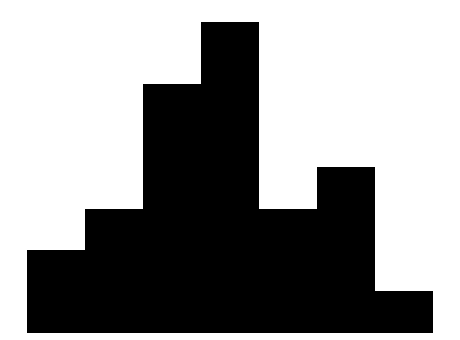

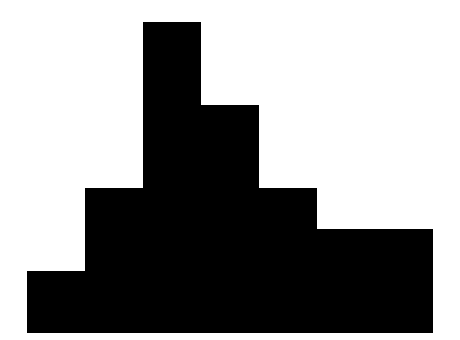

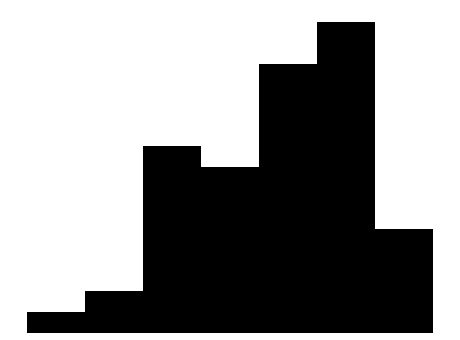

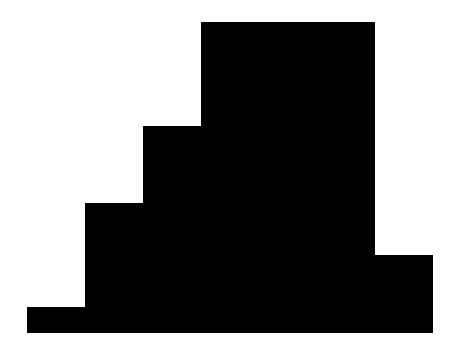

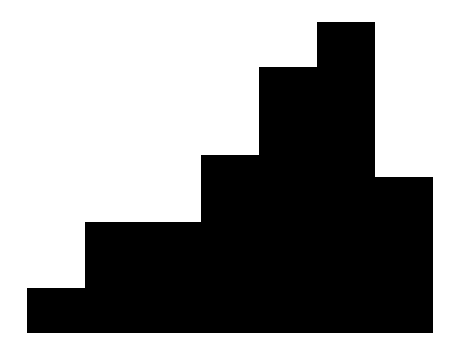

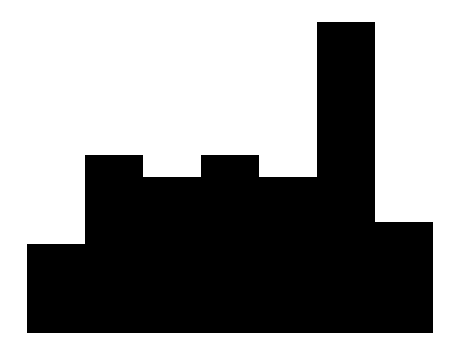

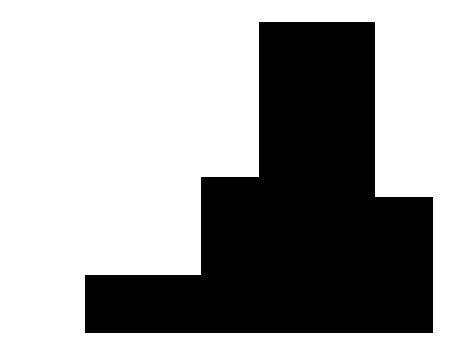

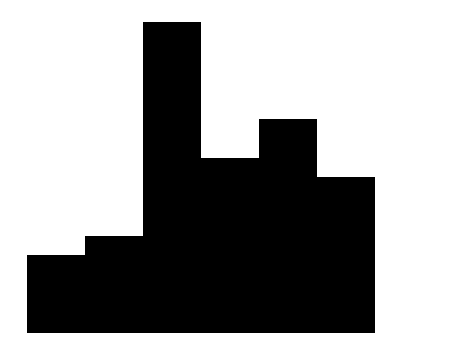

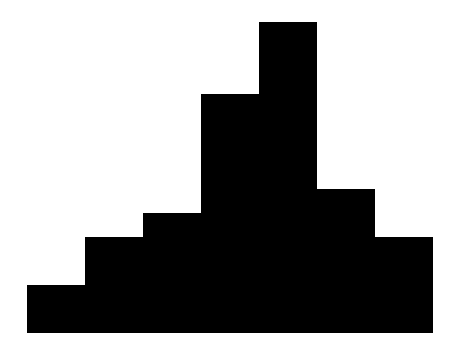

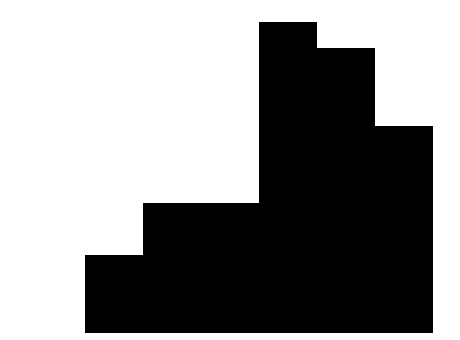

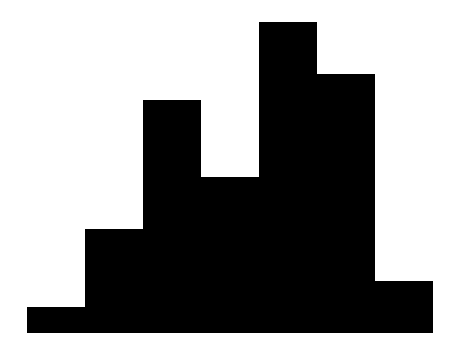

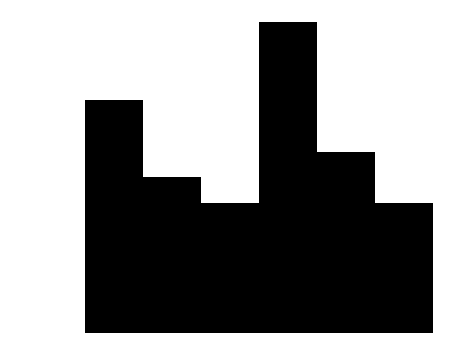

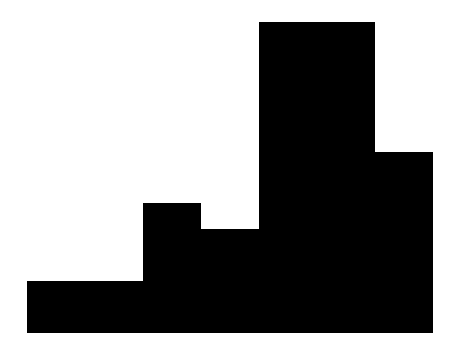

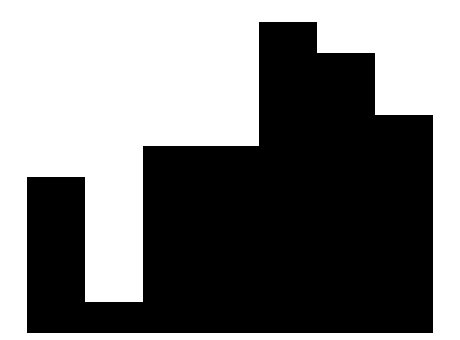

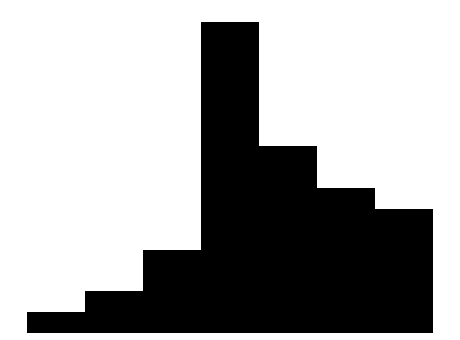

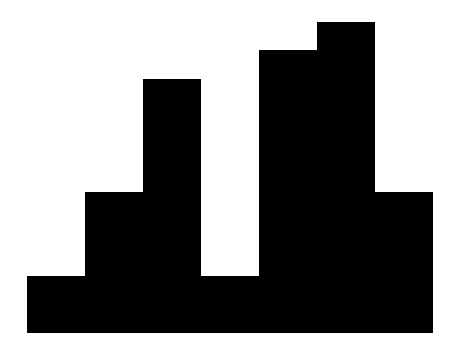

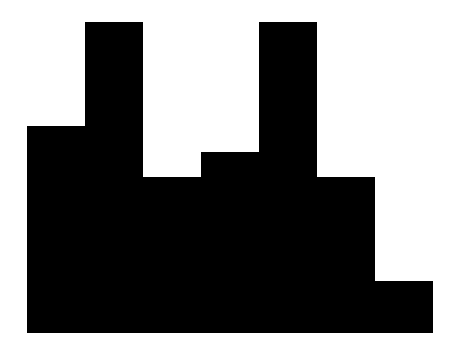

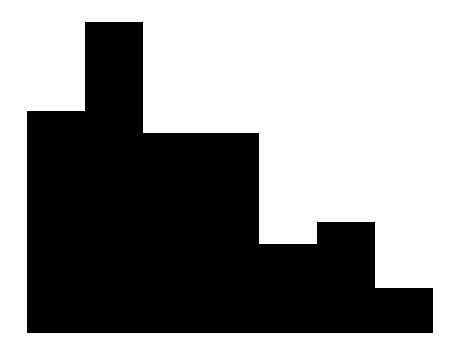

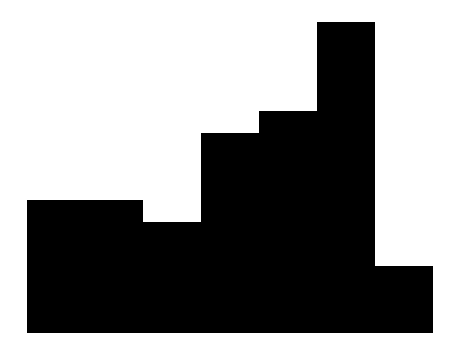

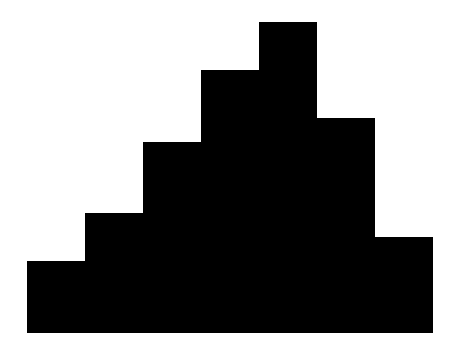

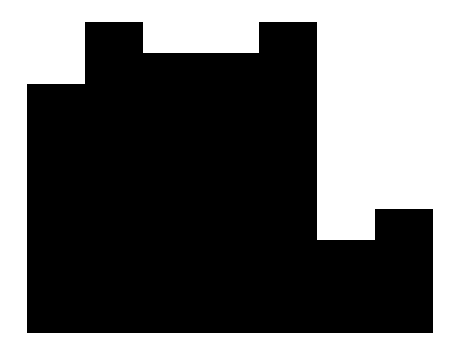

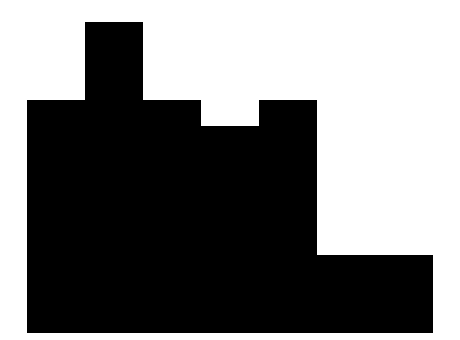

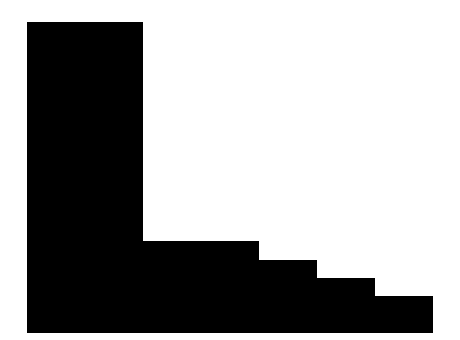

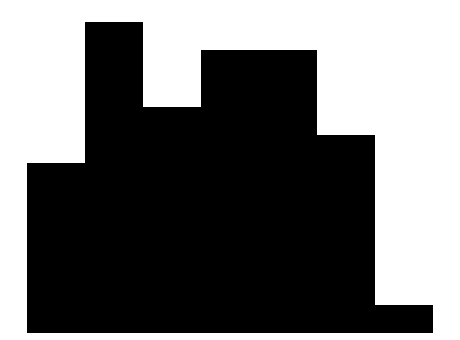

In [38]:
all_condition_list = ["BarGeo", "BarIcon", "PieGeo", "PieIcon", "MapGeo", "MapIcon"]
for condition in all_condition_list:
    plotDistribution(df, "beauvis", condition, width=8, height=6, color="black", save_pdf=True)